<a href="https://colab.research.google.com/github/abuthahir786/abu/blob/main/ABUTASK345.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#KNN Classification Use the species column (Setosa, Versicolor, Virginica) as the target.

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

# Define features (X) and target variable (y)
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3) # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [2]:
#*Implement K-Nearest Neighbors (KNN) for classification.

# Assuming X_train, X_test, y_train, y_test are already defined and preprocessed (if necessary).
# Example:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5) # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


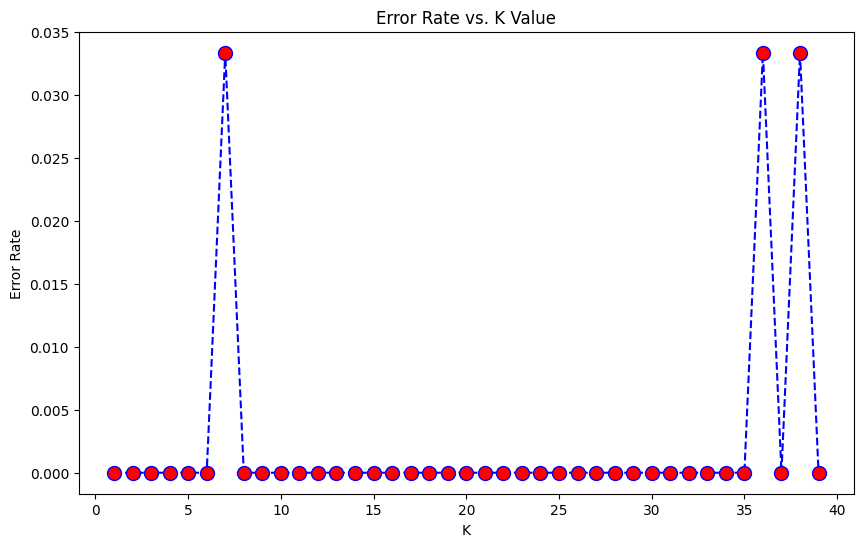

In [4]:
#KNN Classification Tune the k-value (number of neighbors)

import matplotlib.pyplot as plt
import numpy as np
# Find the best k-value
error_rate = []
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


In [6]:
 #*KNN Classification and Evaluate the model using accuracy.

from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined and knn is trained

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


In [7]:
 #*Apply K-Means Clustering using all numerical features.

from sklearn.cluster import KMeans
import pandas as pd

# Assuming iris_df is already loaded as in the provided code
# ... (your existing code to load iris_df)

# Select only numerical features for KMeans
numerical_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X_kmeans = iris_df[numerical_features]

# Apply KMeans clustering (example with 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters
kmeans.fit(X_kmeans)

# Add cluster labels to the DataFrame
iris_df['cluster'] = kmeans.labels_

# Print the DataFrame with cluster assignments
print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  cluster  
0  setosa        1  
1  setosa        1  
2  setosa        1  
3  setosa        1  
4  setosa        1  


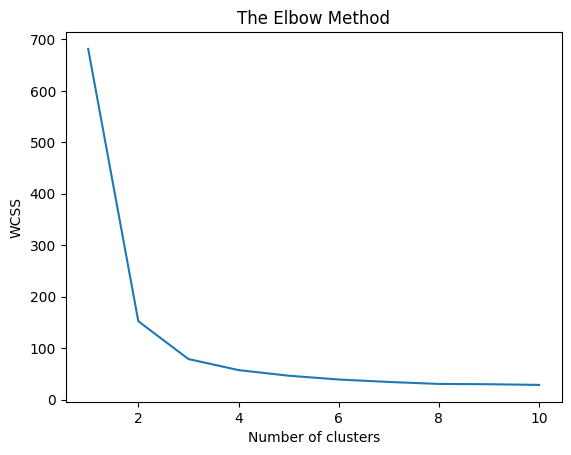

In [8]:
 #K-Means Clustering-- Find the optimal number of clusters using the Elbow Method.

import matplotlib.pyplot as plt
# Assuming X_kmeans is defined as in the previous code
# ... (your existing code to load and prepare X_kmeans)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_kmeans)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


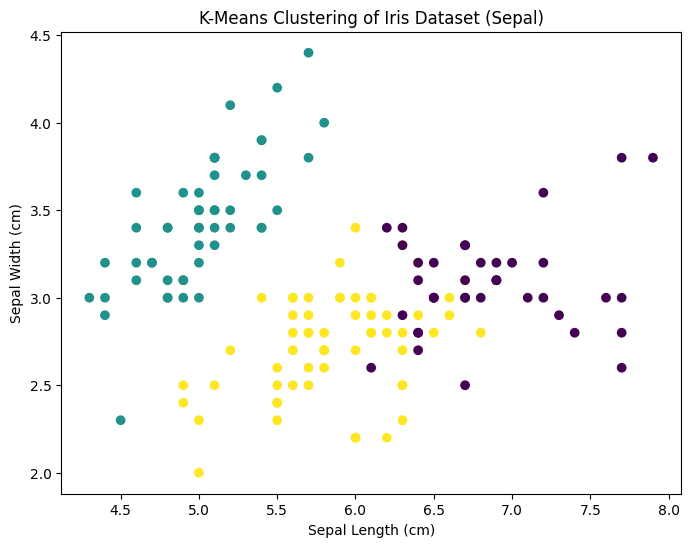

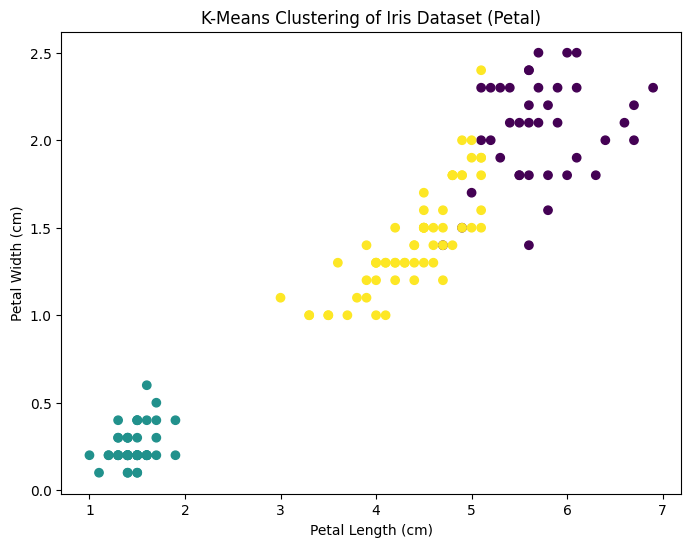

In [9]:
#K-Means Clustering Visualize clusters using scatter plots.

import matplotlib.pyplot as plt

# Assuming iris_df and kmeans are defined as in the previous code
# ... (your existing code to load and prepare the data and perform KMeans)

# Visualize clusters using scatter plots
plt.figure(figsize=(8, 6))
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=iris_df['cluster'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-Means Clustering of Iris Dataset (Sepal)')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], c=iris_df['cluster'])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-Means Clustering of Iris Dataset (Petal)')
plt.show()


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.78      0.88         9
   virginica       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]


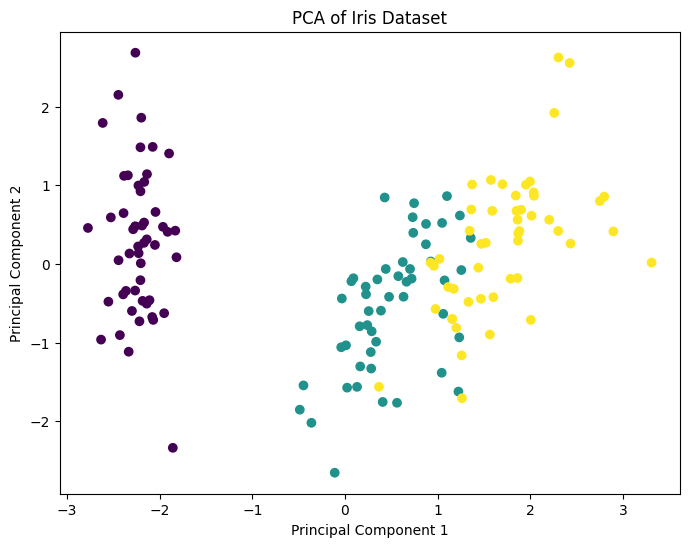

In [11]:
#PCA with KNN Apply PCA to reduce dimensions to 2D or 3D.

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

# Separate features and target variable
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)  # or n_components=3 for 3D
X_pca = pca.fit_transform(X_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize and train a KNN classifier on the PCA-transformed data
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Visualize the PCA-transformed data (2D)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.show()


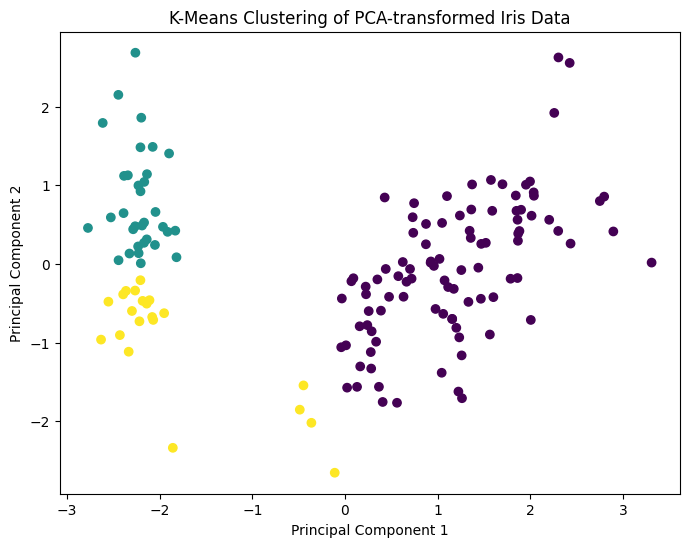

In [13]:
 #*Train K-Means on the PCA-transformed dataset.

import matplotlib.pyplot as plt
# Assuming X_pca and y are defined from the previous code block.
# Apply KMeans clustering to the PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=42) # You can adjust the number of clusters
kmeans.fit(X_pca)

# Add cluster labels to the DataFrame (if you have the original DataFrame)
# iris_df['cluster_pca'] = kmeans.labels_  # Assuming iris_df exists

# Visualize the clusters on the PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering of PCA-transformed Iris Data')
plt.show()
